In [38]:
# from pyvis.network import Network
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [26]:
def is_flake_of_stone(flake_id, stone_id) -> bool:
    return flake_id[:len(stone_id)] == stone_id

In [27]:
letters = ['a', 'b', 'c', 'd', 'e', 'f',]

In [29]:
dataset = pd.read_excel('data/Melton_sequence_data_sample.xlsx', sheet_name='SAMPLE_DATA')
# dataset

In [124]:
# stone_id = 'BT.1.4-25'
stone_id = 'BT.1.A'
# stone_id = 'BT.1.C'
# stone_id = 'BT.1.F'
# stone_id = 'BT.2.65'
# stone_id = 'BT.2.UUU'

In [125]:
G = nx.DiGraph()
for index, row in dataset.iterrows():
    if is_flake_of_stone(row['Sample_ID'], stone_id):
        G.add_node(row['Sample_ID'])
for index, row in dataset.iterrows():
    if is_flake_of_stone(row['Sample_ID'], stone_id):
        for l in letters:
            if row[f'Subsequent_removal_{l}'] == row[f'Subsequent_removal_{l}']:
                G.add_edge(row['Sample_ID'], row[f'Subsequent_removal_{l}'])
print(G)

DiGraph with 26 nodes and 68 edges


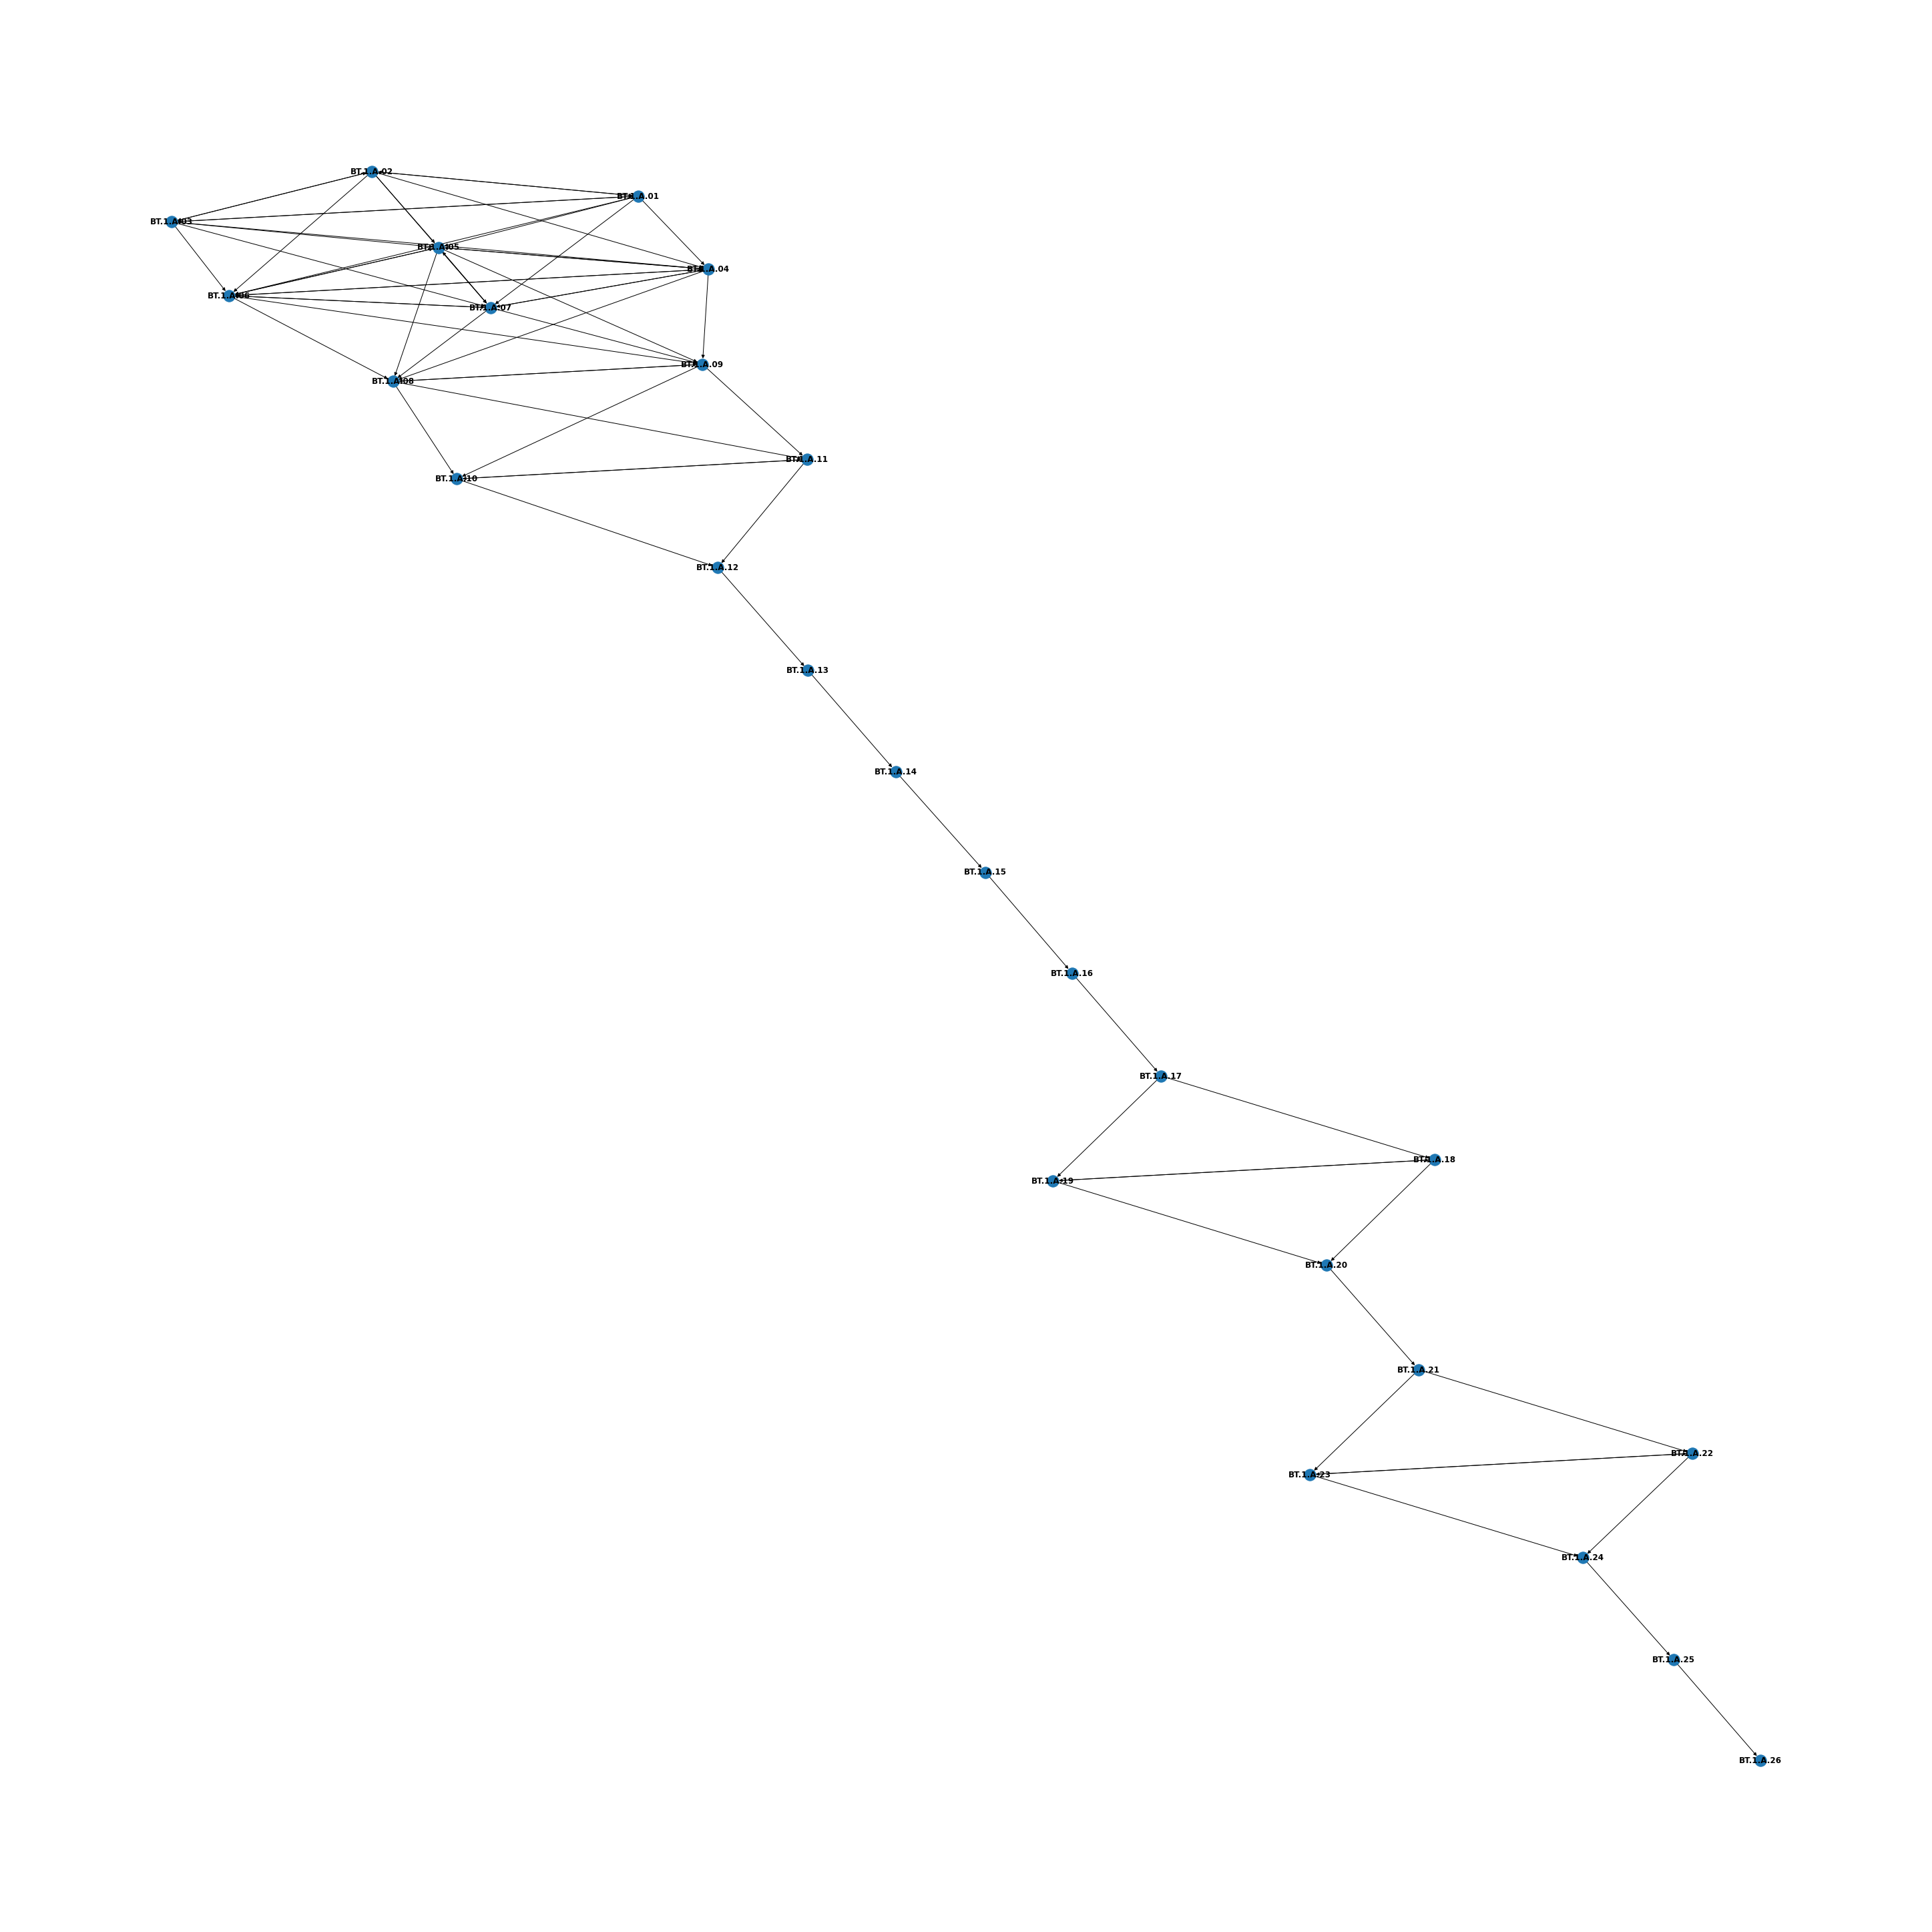

In [126]:
plt.figure(figsize=(40, 40))
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True, font_weight='bold')
plt.show()

In [158]:
import random


def core_node(graph):
    for n in graph.nodes():
        if graph.out_degree(n) == 0:
            return n
    return None

def extend_tail_randomly(graph, tail):
    if len(tail) == len(graph.nodes):
        return tail
    interlayer = set()
    for n in tail:
        for p in graph.predecessors(n):
            interlayer.add(p)
    for n in tail:
        if n in interlayer:
            interlayer.remove(n)
    tail.append(random.choice([i for i in interlayer]))
    return tail
    
def random_graph_sequence(graph):
    core = core_node(graph)
    tail = [core]
    for i in range(len(graph.nodes)):
        tail = extend_tail_randomly(graph, tail)
    tail.reverse()
    return tail

In [159]:
random_graph_sequence(G)

['BT.1.A.05',
 'BT.1.A.08',
 'BT.1.A.06',
 'BT.1.A.04',
 'BT.1.A.02',
 'BT.1.A.03',
 'BT.1.A.01',
 'BT.1.A.11',
 'BT.1.A.07',
 'BT.1.A.09',
 'BT.1.A.10',
 'BT.1.A.12',
 'BT.1.A.13',
 'BT.1.A.14',
 'BT.1.A.15',
 'BT.1.A.16',
 'BT.1.A.17',
 'BT.1.A.23',
 'BT.1.A.19',
 'BT.1.A.18',
 'BT.1.A.20',
 'BT.1.A.21',
 'BT.1.A.22',
 'BT.1.A.24',
 'BT.1.A.25',
 'BT.1.A.26']